In [99]:
# Se importa las librerias para utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from dmba import classificationSummary
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, mean_absolute_error, auc, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

In [2]:
# Se le llama a la base de datos y se le inserta en una variable, además, se le decodifica
proyecto = pd.read_csv("PublicHospitalDataset.csv", encoding="latin1")
proyecto.head(25)

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1
5,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,Male,81.0,1
6,1,1,Yes,Private,Rural,70.09,27.4,never smoked,Male,74.0,1
7,0,0,No,Private,Urban,94.39,22.8,never smoked,Female,69.0,1
8,0,0,Yes,ksdh-k,Rural,76.15,NaN,Unknown,Female,59.0,1
9,0,0,Yes,Private,Urban,58.57,24.2,Unknown,Female,78.0,1


### 1.1 Describiendo los datos

In [3]:
# Se muestran los tipos de datos
proyecto.dtypes

Hypertension           int64
Heart Disease          int64
Married               object
Work                  object
Residence             object
Avg_glucose_level    float64
Bmi                  float64
Smoking               object
Gender                object
Age                  float64
Stroke                 int64
dtype: object

In [4]:
# Se muestra la forma de matriz del DF
print(proyecto.shape)

proyecto_limpio=proyecto

(5110, 11)


In [5]:
#Se muestran todas las categorias para cada una de las variaables categóricas
proyecto.groupby("Gender").count()

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Age,Stroke
Gender,,,,,,,,,,
Female,2994,2994,2994,2994,2994,2994,2897,2994,2994,2994
Male,2115,2115,2115,2115,2115,2115,2011,2115,2115,2115
Other,1,1,1,1,1,1,1,1,1,1


In [6]:
proyecto.groupby("Heart Disease").count()

,Hypertension,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
Heart Disease,,,,,,,,,,
0,4834,4834,4834,4834,4834,4666,4834,4834,4834,4834
1,276,276,276,276,276,243,276,276,276,276


In [7]:
proyecto.groupby("Hypertension").count()

,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
Hypertension,,,,,,,,,,
0,4612,4612,4612,4612,4612,4458,4612,4612,4612,4612
1,498,498,498,498,498,451,498,498,498,498


In [8]:
proyecto.groupby("Married").count()

,Hypertension,Heart Disease,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
Married,,,,,,,,,,
No,1757,1757,1757,1757,1757,1705,1757,1757,1757,1757
Yes,3353,3353,3353,3353,3353,3204,3353,3353,3353,3353


In [9]:
proyecto.groupby("Work").count()

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
Work,,,,,,,,,,
Govt_job,657,657,657,657,657,630,657,657,657,657
Never_worked,22,22,22,22,22,22,22,22,22,22
Private,2919,2919,2919,2919,2919,2806,2919,2919,2919,2919
Self-employed,818,818,818,818,818,774,818,818,818,818
children,687,687,687,687,687,671,687,687,687,687
dsfsdf,2,2,2,2,2,2,2,2,2,2
ksdh-k,1,1,1,1,1,0,1,1,1,1
sdfsdf,3,3,3,3,3,3,3,3,3,3
sdsd-i,1,1,1,1,1,1,1,1,1,1


In [10]:
proyecto.groupby("Residence").count()

,Hypertension,Heart Disease,Married,Work,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
Residence,,,,,,,,,,
Rural,2514,2514,2514,2514,2514,2419,2514,2514,2514,2514
Urban,2596,2596,2596,2596,2596,2490,2596,2596,2596,2596


In [11]:
proyecto.groupby("Smoking").count()

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Gender,Age,Stroke
Smoking,,,,,,,,,,
Unknown,1544,1544,1544,1544,1544,1544,1483,1544,1544,1544
formerly smoked,885,885,885,885,885,885,837,885,885,885
never smoked,1892,1892,1892,1892,1892,1892,1852,1892,1892,1892
smokes,789,789,789,789,789,789,737,789,789,789


In [12]:
proyecto.groupby("Stroke").count()

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age
Stroke,,,,,,,,,,
0,4861,4861,4861,4861,4861,4861,4700,4861,4861,4861
1,249,249,249,249,249,249,209,249,249,249


In [13]:
# La funcion isna cuenta todos los valores que no sean nulos para las variables numericas
proyecto["Avg_glucose_level"].isna().sum()

0

In [14]:
proyecto["Bmi"].isna().sum()

201

In [15]:
proyecto["Age"].isna().sum()

0

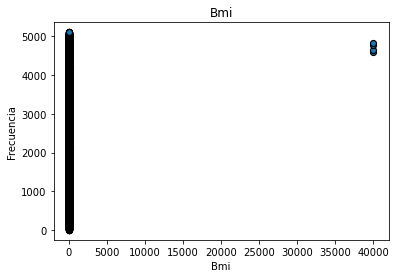

In [16]:
plt.scatter(proyecto['Bmi'],proyecto.index,linewidth=1.2,edgecolor='black',)
plt.title('Bmi')
plt.xlabel('Bmi')
plt.ylabel('Frecuencia')

plt.show()

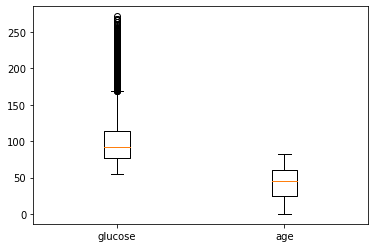

In [17]:
#Se hace graficas de boxplot para las variables numéricas, así podemos encontrar valores atípicos por medio de 
#visualización
glucose = proyecto['Avg_glucose_level']
age = proyecto['Age']
data = [glucose, age]
plt.boxplot(data)
plt.xticks([1,2], ["glucose","age"])
plt.show()

### 1.2 Manejo de variables nulos/atipicos

In [18]:
#Se tratan los valores atípicos en Bmi, asignandoles valores Nan.
#106 es el valorde Bmi más alto registrado en toda la historia, así que se usa  como rango superior para
#excluir valores atípicos
proyecto_limpio.loc[proyecto_limpio['Bmi']>106,'Bmi']=np.nan
proyecto_limpio.head(25)

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1
5,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,Male,81.0,1
6,1,1,Yes,Private,Rural,70.09,27.4,never smoked,Male,74.0,1
7,0,0,No,Private,Urban,94.39,22.8,never smoked,Female,69.0,1
8,0,0,Yes,ksdh-k,Rural,76.15,NaN,Unknown,Female,59.0,1
9,0,0,Yes,Private,Urban,58.57,24.2,Unknown,Female,78.0,1


In [19]:
# Los valores existentes en la columna Work
proyecto_limpio["Work"].unique()

array(['Private', 'Self-employed', 'k\x96sdh-k', 'Govt_job', 'sdsd-i',
       'children', 'Never_worked', 'dsfsdf', 'sdfsdf'], dtype=object)

In [20]:
# Se le combina la categoria children a never_worked 
proyecto_limpio.loc[proyecto_limpio['Work']=='children','Work']='Never_worked'

In [21]:
# Elimina las filas que no sirven de la columna Work
proyecto_limpio = proyecto_limpio[~proyecto_limpio.Work.isin(["sdsd-i", "dsfsdf", "sdfsdf",'k\x96sdh-k'])]
proyecto_limpio["Work"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'Never_worked'],
      dtype=object)

In [22]:
# Se observa que la columna Gender tiene una observacion con valores de other...
proyecto_limpio["Gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [23]:
#... entonces se procede a eliminar las filas con valores other
proyecto_limpio.drop(proyecto_limpio[(proyecto_limpio['Gender']=="Other")].index, inplace=True)
proyecto_limpio["Gender"].unique()

C:\Users\Joaquín\AppData\Local\Temp\ipykernel_2984\1501414486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proyecto_limpio.drop(proyecto_limpio[(proyecto_limpio['Gender']=="Other")].index, inplace=True)


array(['Male', 'Female'], dtype=object)

In [24]:
# Se cambia los valores de la columna Married a 1 si es si y 0 si es no
# OJO SOLO CORRER UNA VEZ PORQUE PARA LA SEGUNDA DA ERROR
proyecto_limpio['Married'] = proyecto_limpio['Married'].replace({'No': 0, 'Yes': 1})
proyecto_limpio['Married'] = proyecto_limpio['Married'].astype(int)
proyecto_limpio.head(10)

C:\Users\Joaquín\AppData\Local\Temp\ipykernel_2984\4054806846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proyecto_limpio['Married'] = proyecto_limpio['Married'].replace({'No': 0, 'Yes': 1})
C:\Users\Joaquín\AppData\Local\Temp\ipykernel_2984\4054806846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proyecto_limpio['Married'] = proyecto_limpio['Married'].astype(int)


,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,1,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,1,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1
5,0,0,1,Private,Urban,186.21,29.0,formerly smoked,Male,81.0,1
6,1,1,1,Private,Rural,70.09,27.4,never smoked,Male,74.0,1
7,0,0,0,Private,Urban,94.39,22.8,never smoked,Female,69.0,1
9,0,0,1,Private,Urban,58.57,24.2,Unknown,Female,78.0,1
10,1,0,1,Private,Rural,80.43,29.7,never smoked,Female,81.0,1


In [25]:
# Se le cambia a la columna Smoking en datos categoricos
print(proyecto_limpio.Smoking.dtype)
proyecto_limpio.Smoking = proyecto_limpio.Smoking.astype('category')
print(proyecto_limpio.Smoking.cat.categories)  # Se les divide por categorias
print(proyecto_limpio.Smoking.dtype)  # El tipo de la columna ahora es categorica

C:\Users\Joaquín\AppData\Local\Temp\ipykernel_2984\2985326570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proyecto_limpio.Smoking = proyecto_limpio.Smoking.astype('category')


object
Index(['Unknown', 'formerly smoked', 'never smoked', 'smokes'], dtype='object')
category


In [26]:
# Se convierte variables categoricas a variables dummies
proyecto_limpio = pd.get_dummies(proyecto_limpio, drop_first=True)
proyecto_limpio.columns

Index(['Hypertension', 'Heart Disease', 'Married', 'Avg_glucose_level', 'Bmi',
       'Age', 'Stroke', 'Work_Never_worked', 'Work_Private',
       'Work_Self-employed', 'Residence_Urban', 'Smoking_formerly smoked',
       'Smoking_never smoked', 'Smoking_smokes', 'Gender_Male'],
      dtype='object')

In [27]:
# con la funcion melt se cambia las columnas a las filas 
proyecto_limpio = pd.melt(proyecto_limpio,
    id_vars = ["Hypertension", "Heart Disease", "Married", "Avg_glucose_level", "Bmi", "Age", "Stroke"], # Las columnas/variables que si están bien
    var_name = "Type",# Cómo le queremos llamar a la nueva columna
    value_name = "PersonType") # Lo mismo que la anterior pero para los valores dentro de la tabla)
proyecto_limpio.tail(50)


,Hypertension,Heart Disease,Married,Avg_glucose_level,Bmi,Age,Stroke,Type,PersonType
40766,0,0,0,89.29,23.4,21.00,0,Gender_Male,1
40767,0,0,1,120.23,22.7,61.00,0,Gender_Male,0
40768,0,0,1,60.22,29.7,78.00,0,Gender_Male,1
40769,0,0,1,223.78,32.3,41.00,0,Gender_Male,1
40770,0,0,1,211.58,36.9,82.00,0,Gender_Male,0
40771,0,0,1,179.38,27.7,39.00,0,Gender_Male,1
40772,0,0,1,193.88,24.3,70.00,0,Gender_Male,1
40773,0,0,0,118.41,25.1,37.00,0,Gender_Male,0
40774,0,0,0,138.51,24.3,21.00,0,Gender_Male,1
40775,0,0,1,120.03,24.3,80.00,0,Gender_Male,1


In [28]:
proyecto_limpio['Age'] = proyecto_limpio['Age'].round(0)
proyecto_limpio

,Hypertension,Heart Disease,Married,Avg_glucose_level,Bmi,Age,Stroke,Type,PersonType
0,0,1,1,228.69,36.6,67.0,1,Work_Never_worked,0
1,0,0,1,202.21,NaN,61.0,1,Work_Never_worked,0
2,0,1,1,105.92,32.5,80.0,1,Work_Never_worked,0
3,0,0,1,171.23,34.4,49.0,1,Work_Never_worked,0
4,1,0,1,174.12,24.0,79.0,1,Work_Never_worked,0
...,...,...,...,...,...,...,...,...,...
40811,0,0,0,103.08,18.6,13.0,0,Gender_Male,0
40812,1,0,1,83.75,NaN,80.0,0,Gender_Male,0
40813,0,0,1,82.99,30.6,35.0,0,Gender_Male,0
40814,0,0,1,166.29,25.6,51.0,0,Gender_Male,1


In [29]:
# Ordenar la tabla de arriba 
proyecto_limpio = proyecto_limpio.pivot(index=["Hypertension", "Heart Disease", "Married", "Avg_glucose_level", "Bmi", "Age", "Stroke"],
                            columns='Type',
                            values='PersonType')

In [30]:
# Eliminar la el nombre Type del DF
proyecto_limpio.columns.name = None
proyecto_limpio = proyecto_limpio.reset_index()
proyecto_limpio.head()

,Hypertension,Heart Disease,Married,Avg_glucose_level,Bmi,Age,Stroke,Gender_Male,Residence_Urban,Smoking_formerly smoked,Smoking_never smoked,Smoking_smokes,Work_Never_worked,Work_Private,Work_Self-employed
0,0,0,0,55.12,21.8,21.0,0,0,0,0,1,0,0,1,0
1,0,0,0,55.25,20.4,20.0,0,1,1,0,1,0,0,1,0
2,0,0,0,55.34,15.3,10.0,0,1,1,0,0,0,1,0,0
3,0,0,0,55.35,22.7,5.0,0,0,1,0,0,0,1,0,0
4,0,0,0,55.39,23.2,13.0,0,1,0,0,0,0,1,0,0


In [31]:
# Se les cambia el nombre de las columnas para una mejor interpretación
proyecto_limpio.rename(columns={"Smoking_formerly smoked":"Formerly Smoked", 
                         "Smoking_never smoked":"Never Smoked", 
                         "Smoking_smokes":"Smokes", 
                         "Work_Never_worked":"Never Worked", 
                         "Work_Private": "Private Work", 
                         "Work_Self-employed":"Self-Employed Work"}, inplace = True)
proyecto_limpio

,Hypertension,Heart Disease,Married,Avg_glucose_level,Bmi,Age,Stroke,Gender_Male,Residence_Urban,Formerly Smoked,Never Smoked,Smokes,Never Worked,Private Work,Self-Employed Work
0,0,0,0,55.12,21.8,21.0,0,0,0,0,1,0,0,1,0
1,0,0,0,55.25,20.4,20.0,0,1,1,0,1,0,0,1,0
2,0,0,0,55.34,15.3,10.0,0,1,1,0,0,0,1,0,0
3,0,0,0,55.35,22.7,5.0,0,0,1,0,0,0,1,0,0
4,0,0,0,55.39,23.2,13.0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,1,1,1,246.53,27.2,59.0,0,1,0,1,0,0,0,1,0
5098,1,1,1,247.51,40.5,68.0,1,0,1,1,0,0,0,1,0
5099,1,1,1,250.89,28.1,81.0,1,1,1,0,0,1,0,1,0
5100,1,1,1,254.63,31.0,67.0,0,1,0,0,1,0,0,1,0


In [32]:
#Se crea una tabla de correlación y se muestra las correlaciones de la variable Bmi
corr_matrix = proyecto_limpio.corr()
bmi_corr = corr_matrix['Bmi'].sort_values(ascending=False)
print(bmi_corr)

Bmi                   1.000000
Married               0.340352
Age                   0.332460
Private Work          0.208450
Avg_glucose_level     0.175767
Hypertension          0.167296
Formerly Smoked       0.107028
Never Smoked          0.106993
Smokes                0.088912
Self-Employed Work    0.072012
Stroke                0.042390
Heart Disease         0.041362
Residence_Urban       0.000572
Gender_Male          -0.025664
Never Worked         -0.448083
Name: Bmi, dtype: float64


In [33]:
#Para tratar los valores Nan de Bmi, se procede a utilizar distintos tipos de regresiones. Se comienza por una regresión lineal
#Se utilizan las dos variables numericas para esto. Se crean sets te entrenamiento y validación, incluyendo y excluyendo los valores 
#Nan
proyecto_train = proyecto_limpio.dropna()
proyecto_test = proyecto_limpio[proyecto['Bmi'].isnull()]
X_train = proyecto_train[['Age', 'Avg_glucose_level']]
y_train = proyecto_train['Bmi']
#Se crea el modelo y se lo entrena con los sets de entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

#Se usa el modelo para predecir los valores de Bmi
X_test = proyecto_test[['Age', 'Avg_glucose_level']]
y_test_pred = model.predict(X_test)

#Se reemplazan los valores en el set test
proyecto_test['Bmi'] = y_test_pred
proyecto_test = proyecto_test.dropna()

C:\Users\Joaquín\AppData\Local\Temp\ipykernel_2984\2719044570.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  proyecto_test = proyecto_limpio[proyecto['Bmi'].isnull()]
C:\Users\Joaquín\AppData\Local\Temp\ipykernel_2984\2719044570.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proyecto_test['Bmi'] = y_test_pred


In [34]:
# Usando los valores reales y los predichos, se obtiene el Mse, para calcular el error
y_true = proyecto_train['Bmi'].tolist() + proyecto_test['Bmi'].tolist()
y_pred = model.predict(proyecto_limpio[['Age', 'Avg_glucose_level']])
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  55.36265242369943


In [35]:
# Se calcula el r2
y_train_pred = model.predict(X_train)
r2 = r2_score(y_train, y_train_pred)
print(f'R-squared: {r2}')

R-squared: 0.12061428992819334


In [36]:
#Se crea un modelo de regresión lineal, pero esta vez se usan todas las variables para crear el modelo
proyecto_train = proyecto_limpio.dropna()
proyecto_test = proyecto_limpio[proyecto['Bmi'].isnull()]

X_train = proyecto_train.drop('Bmi', axis=1)
y_train = proyecto_train['Bmi']
model = LinearRegression()
model.fit(X_train, y_train)

X_test = proyecto_test.drop('Bmi', axis=1)
y_test_pred = model.predict(X_test)


proyecto_test['Bmi'] = y_test_pred
proyecto_test = proyecto_test.dropna()

C:\Users\Joaquín\AppData\Local\Temp\ipykernel_2984\983458632.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  proyecto_test = proyecto_limpio[proyecto['Bmi'].isnull()]
C:\Users\Joaquín\AppData\Local\Temp\ipykernel_2984\983458632.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proyecto_test['Bmi'] = y_test_pred


In [37]:
#Se obtiene el mse
y_true = proyecto_train['Bmi'].tolist() + proyecto_test['Bmi'].tolist()
y_pred = model.predict(proyecto_limpio.drop('Bmi', axis=1))
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  57.92426392108622


In [38]:
#Se obtiene el r2
r2 = r2_score(y_true, y_pred)

print('R-squared:', r2)

R-squared: 0.032298594350933074


In [39]:
#Se utiliza una regresion de Lasso y ridge para intentar generar los datos faltantes en Bmi
df =proyecto_limpio.dropna()

y = df['Bmi']
X = df.drop('Bmi', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Se hace la regresion de Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print("R2 Lasso: ", r2_score_lasso)

#Se hace la regresión de ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
print("R2 Ridge: ", r2_score_ridge)

R2 Lasso:  0.24606666511520947
R2 Ridge:  0.25034078175002084


In [40]:
#Se comprueba que el numero de Nan sea el mismo en nustra df pricipal
proyecto_limpio.isna().sum()

Hypertension            0
Heart Disease           0
Married                 0
Avg_glucose_level       0
Bmi                   204
Age                     0
Stroke                  0
Gender_Male             0
Residence_Urban         0
Formerly Smoked         0
Never Smoked            0
Smokes                  0
Never Worked            0
Private Work            0
Self-Employed Work      0
dtype: int64

In [41]:
#Se hace una regresión de arbol de decisión
df =proyecto_limpio.dropna()
train, test = train_test_split(df, test_size=0.2, random_state=42)

X_train = train.drop('Bmi', axis=1)
y_train = train['Bmi']
X_test = test.drop('Bmi', axis=1)
y_test = test['Bmi']

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)


predicted_bmi = dt_reg.predict(X_test)

#Se calcula el r2 del modelo
r_squared = r2_score(y_test, predicted_bmi)
print(f'R2: {r_squared}')

R2: -0.460412921810577


In [42]:
# Se aplica KNN para obtener los valores
proyecto_copy = proyecto_limpio.copy()

# Se crea una mascara de valores faltantes
missing_mask = proyecto_copy['Bmi'].isna()

# Se reemplazan los valores faltantes por -1
proyecto_copy.loc[missing_mask, 'Bmi'] = -1

# Se crea un imputador
imputer = KNNImputer(n_neighbors=5)

# Se añade al imútador en el df
imputer.fit(proyecto_copy[['Bmi']])

# Se usa el imputador parallenar los valoresfaltantes
proyecto_copy['Bmi'] = imputer.transform(proyecto_copy[['Bmi']])

# Se obtiene los valores faltantes y los predichos
predicted_values = proyecto_copy.loc[missing_mask, 'Bmi']
actual_values = proyecto_limpio.loc[missing_mask, 'Bmi']

In [43]:
#Se hace lo mismo con una mustra aleatoria y así poder obtener el r2
proyecto_limpio.loc[proyecto_limpio['Bmi'].isna(), 'Bmi'] = proyecto_limpio['Bmi'].mean()

proyecto_copy = proyecto_limpio.copy()

test_mask = proyecto_copy['Bmi'].dropna().sample(n=50, random_state=42)

imputer = KNNImputer(n_neighbors=5)

imputer.fit(proyecto_copy[['Bmi']])

proyecto_copy['Bmi'] = imputer.transform(proyecto_copy[['Bmi']])

predicted_values = proyecto_copy.loc[test_mask.index, 'Bmi']
actual_values = proyecto_limpio.loc[test_mask.index, 'Bmi']

# Se calcula el RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

print("RMSE: ", rmse)
print("RMSE significa Root Median Square Error en donde un valor de 0 es que no existe error")

RMSE:  0.0
RMSE significa Root Median Square Error en donde un valor de 0 es que no existe error


In [44]:
#Se calcula el r2
r2 = r2_score(actual_values, predicted_values)
print("R-squared:", r2)

R-squared: 1.0


In [45]:
#Se verifica que ya no existan valores faltantes
proyecto_limpio = proyecto_copy
proyecto_limpio.isna().sum()

Hypertension          0
Heart Disease         0
Married               0
Avg_glucose_level     0
Bmi                   0
Age                   0
Stroke                0
Gender_Male           0
Residence_Urban       0
Formerly Smoked       0
Never Smoked          0
Smokes                0
Never Worked          0
Private Work          0
Self-Employed Work    0
dtype: int64

### 1.3 Correlacion entre variables predictivas

<AxesSubplot:>

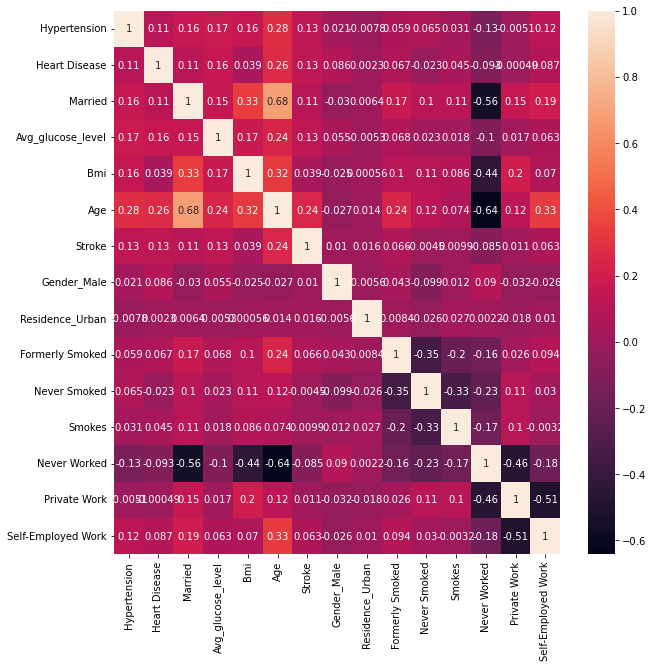

In [46]:
#Se crea un mapa de correlación entre todas lasvariables
plt.figure(figsize = (10, 10))
sns.heatmap(proyecto_limpio.corr(), annot = True)

### 1.4 Visualizacion de Datos

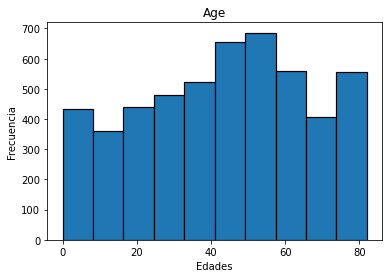

In [47]:
#Se crean hsitogramas para visualizar cada una de las variables
plt.hist(proyecto_limpio['Age'],linewidth=1.2,edgecolor='black',)
plt.title('Age')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')

plt.show()

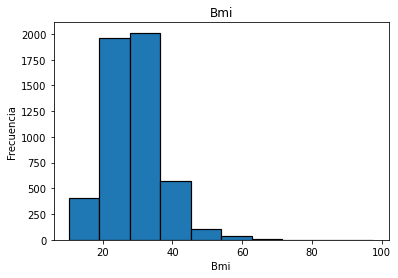

In [48]:
plt.hist(proyecto_limpio['Bmi'],linewidth=1.2,edgecolor='black',)
plt.title('Bmi')
plt.xlabel('Bmi')
plt.ylabel('Frecuencia')

plt.show()

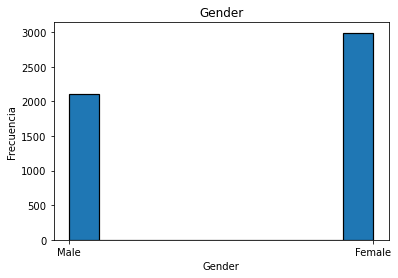

In [49]:

proyecto_vis = proyecto
proyecto.drop(proyecto[(proyecto['Gender']=="Other")].index, inplace=True)

plt.hist(proyecto_vis['Gender'],linewidth=1.2,edgecolor='black',)
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Frecuencia')

plt.show()

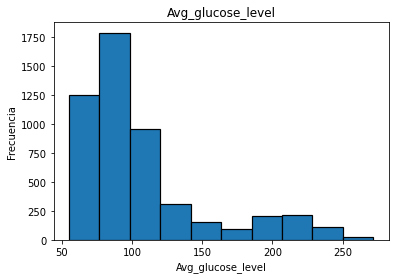

In [50]:
plt.hist(proyecto_limpio['Avg_glucose_level'],linewidth=1.2,edgecolor='black',)
plt.title('Avg_glucose_level')
plt.xlabel('Avg_glucose_level')
plt.ylabel('Frecuencia')

plt.show()

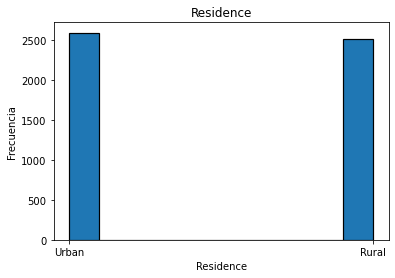

In [51]:

plt.hist(proyecto_vis['Residence'],linewidth=1.2,edgecolor='black',)
plt.title('Residence')
plt.xlabel('Residence')
plt.ylabel('Frecuencia')

plt.show()

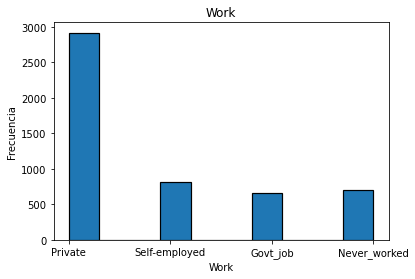

In [52]:
proyecto_vis.loc[proyecto_vis['Work']=='children','Work']='Never_worked'
proyecto_vis = proyecto_vis[~proyecto_vis.Work.isin(["sdsd-i", "dsfsdf", "sdfsdf",'k\x96sdh-k'])]

plt.hist(proyecto_vis['Work'],linewidth=1.2,edgecolor='black',)
plt.title('Work')
plt.xlabel('Work')
plt.ylabel('Frecuencia')

plt.show()

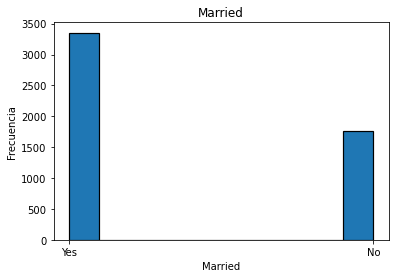

In [53]:
plt.hist(proyecto['Married'],linewidth=1.2,edgecolor='black',)
plt.title('Married')
plt.xlabel('Married')
plt.ylabel('Frecuencia')

plt.show()

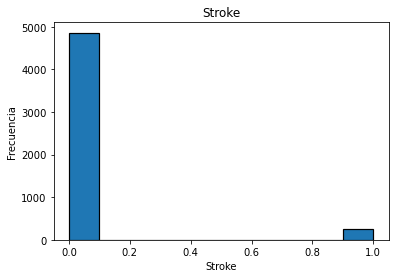

In [54]:
plt.hist(proyecto['Stroke'],linewidth=1.2,edgecolor='black',)
plt.title('Stroke')
plt.xlabel('Stroke')
plt.ylabel('Frecuencia')

plt.show()

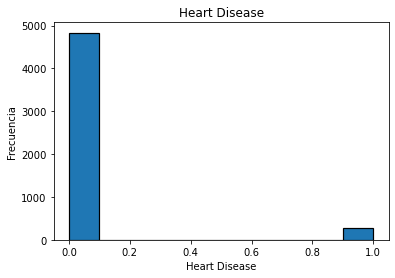

In [55]:
plt.hist(proyecto['Heart Disease'],linewidth=1.2,edgecolor='black',)
plt.title('Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Frecuencia')

plt.show()

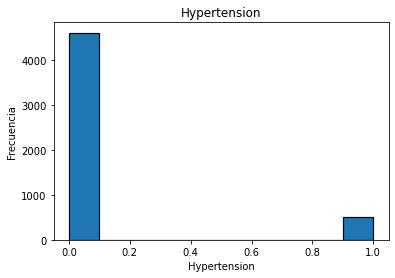

In [56]:

plt.hist(proyecto['Hypertension'],linewidth=1.2,edgecolor='black',)
plt.title('Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Frecuencia')

plt.show()

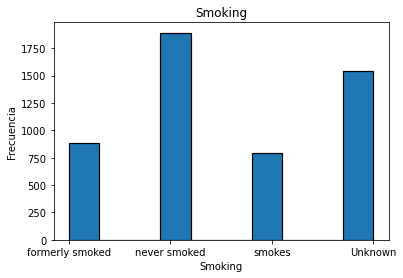

In [57]:
plt.hist(proyecto['Smoking'],linewidth=1.2,edgecolor='black',)
plt.title('Smoking')
plt.xlabel('Smoking')
plt.ylabel('Frecuencia')

plt.show()

### 3. Set de entrenamiento, validacion y prueba

In [58]:
#Se obtiene la muestra aleatoria
#frac devuelve el valor elegido por el tamaño del df para obtener el tamaño
#random_state es el numero de filas que se van a generar en cada iteración
proyecto_limpio = proyecto_limpio.sample(frac=1).reset_index(drop=True)

#Se obtiene el tamaño de cada parte del partition
#Necesario usar int porque están en tipo float
tamaño_training = int(len(proyecto_limpio) * 0.6) #60% para entrenamiento
tamaño_validation = int(len(proyecto_limpio) * 0.2) #20% para validation

#Se crean las particiones seleccionando el numero de filas correspondiente al porcentaje
training = proyecto_limpio[:tamaño_training] #Desde 0 al 60%
validation = proyecto_limpio[tamaño_training:tamaño_training+tamaño_validation] #Corresponde al 20%. Desde el 60% hasta 80%
test = proyecto_limpio[tamaño_training+tamaño_validation:] #Restante. Corresponde al 20%. Desde 80% hasta 100%

#Se imprime el tamaño en formato filas, columnas
print('Training    (60%)  : ', training.shape)
print('Validation  (20%)  : ', validation.shape)
print('Test        (20%)  : ', test.shape)

Training    (60%)  :  (3061, 15)
Validation  (20%)  :  (1020, 15)
Test        (20%)  :  (1021, 15)


### 4. Algoritmo y prueba estadistica

C:\Users\Public\Joaquin\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


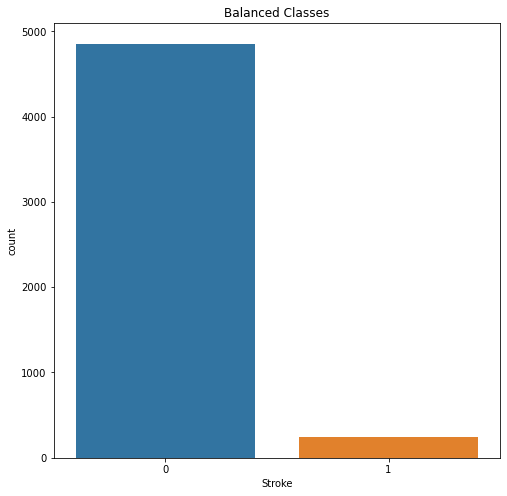

In [59]:
#Undersampling y Oversampling
#Se muestra inicialmente las clases
plt.figure(figsize=(8, 8))
sns.countplot('Stroke', data=proyecto_limpio)
plt.title('Balanced Classes')
plt.show()

C:\Users\Public\Joaquin\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


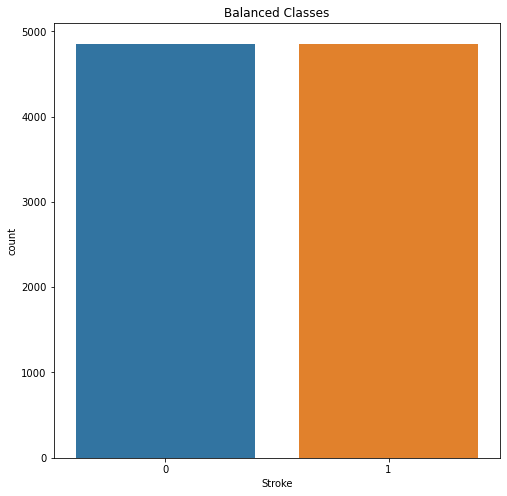

In [60]:
#Undersampling
#Dividir el dataframe en las dos clases mayoritaria y minoritaria
df_majority = proyecto_limpio[proyecto_limpio.Stroke==1]
df_minority = proyecto_limpio[proyecto_limpio.Stroke==0]

#Realizar undersampling de la clase mayoritaria ("Stroke" == 1)
df_majority_undersampled = resample(df_majority, #Se escoge la clase mayoritaria
                                    replace=True,
                                    n_samples=len(df_minority), #Para que el número de datos sea igual para ambas clases
                                    random_state=42)

#Concatenar los subconjuntos de la clase mayoritaria y la clase minoritaria
proyecto_undersampled = pd.concat([df_majority_undersampled, df_minority])

#Gráfico final para ver el cambio
plt.figure(figsize=(8, 8))
sns.countplot('Stroke', data=proyecto_undersampled)
plt.title('Balanced Classes')
plt.show()

C:\Users\Public\Joaquin\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


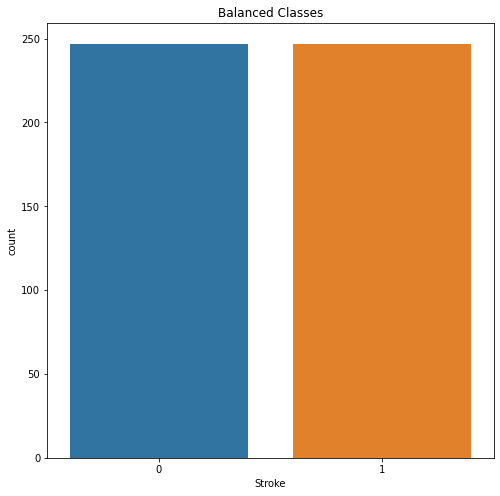

In [61]:
#Oversampling
#Se separa la clase mayoritaria y minoritaria
df_majority = proyecto_limpio[proyecto_limpio.Stroke==1]
df_minority = proyecto_limpio[proyecto_limpio.Stroke==0]

#Se aplica el oversampling a la clase minoritaria
df_minority_oversampled = resample(df_minority, #Se escoge la clase minoritaria
                                   replace=True, 
                                   n_samples=len(df_majority), #Mismo número de valores que clase mayoritaria
                                   random_state=42)
#Se concatenan el df mayoritario con el minoritario hecho oversampling para el dataframe completo
proyecto_oversampled = pd.concat([df_majority, df_minority_oversampled])

#Gráfico final para ver el cambio
plt.figure(figsize=(8, 8))
sns.countplot('Stroke', data=proyecto_oversampled)
plt.title('Balanced Classes')
plt.show()

In [62]:
#Se utiliza una validación cruzada con arbol de desición para comparar las dos tecnicas utilizadas
model = DecisionTreeClassifier()

# Se define el primer df con los datos de oversampled
X1 = proyecto_oversampled.drop('Stroke', axis=1)
y1 = proyecto_oversampled['Stroke']

# Se define el segundo df con los datos de undersampled
X2 = proyecto_undersampled.drop('Stroke', axis=1)
y2 = proyecto_undersampled['Stroke']

# Se hace una validacion cruzada de 10 veces para el primer df
scores1 = cross_val_score(model, X1, y1, cv=10)

# Se hace una validación cruzada 10 veces para el segundo df
scores2 = cross_val_score(model, X2, y2, cv=10)

# Se calcula el puntaje promedio para cada uno de los df
OverSampled = np.mean(scores1)
UnderSampled = np.mean(scores2)

# Se muestraan los puntajes para cada una de las validaciones cruzadas
print("Puntaje promedio Oversampled:", round(OverSampled,2))
print("Puntaje promedio Undersampleds:", round(UnderSampled,2))
print("ENTONCES SE UTILIZA UNDERSAMPLED")

Puntaje promedio Oversampled: 0.69
Puntaje promedio Undersampleds: 0.98
ENTONCES SE UTILIZA UNDERSAMPLED


In [63]:
from scipy.stats import wilcoxon
print("H0: u1 = u2")
print("H1: u1 ≠ u2")
print("Donde u1 es el puntaje promedio del modelo entrenado con undersampling y u2 es el puntaje promedio del modelo entrenado con oversampling")
print("Usando un nivel de significancia de 0.05, entonces:")
#Realizar test de Wilcoxon para muestras relacionadas
stat, p = wilcoxon(scores1, scores2)
print("Valor p:", p)
#Imprimir el resultado del test
if p > 0.05:
    print("No hay evidencia estadística para rechazar la hipótesis nula.")
else:
    print("Hay evidencia estadística para rechazar la hipótesis nula.")

H0: u1 = u2
H1: u1 ≠ u2
Donde u1 es el puntaje promedio del modelo entrenado con undersampling y u2 es el puntaje promedio del modelo entrenado con oversampling
Usando un nivel de significancia de 0.05, entonces:
Valor p: 0.001953125
Hay evidencia estadística para rechazar la hipótesis nula.


### 5. Algoritmos con UnderSampled

In [64]:
#Se utiliza un Bosque de desición para poder predecir losvalores de stroke con los datos del df proyecto_undersampled, la variable de 
#respuesta es Stroke
X = proyecto_undersampled.drop(columns=['Stroke'])
y = proyecto_undersampled['Stroke']

#### Algortimo Random Forest Classifier

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
#Se utiliza el modelo random forest classifier
model = RandomForestClassifier()

In [67]:
#Se entrena el modelo con nustros sets de entrenamiento
model.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
y_pred = model.predict(X_test)

In [69]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=y_pred)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc = auc(x=fpr, y=tpr)

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 3910    0
     1    0 3858
Confusion Matrix (Accuracy 0.9928)

       Prediction
Actual   0   1
     0 931  14
     1   0 997

Exactitud: 0.9928
Precision: 0.9862
Sensibilidad: 1.0
F1 Score: 0.993
AUC: 0.9926
Especificidad:  0.9852
ROC:  0.9925925925925926


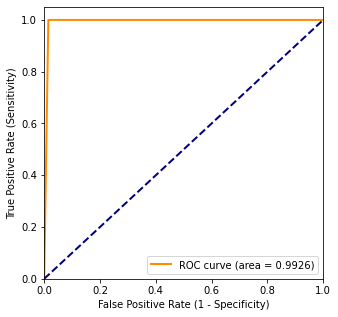

In [70]:
#6.1 se incluye por facilidad
#Para el modelo Random Forest Classifier

classificationSummary(y_train, model.predict(X_train))

classificationSummary(y_test, model.predict(X_test))

#Se muestran los puntajes de presición, accuracy, Recall y F1 para el modelo

print("\nExactitud:", round(accuracy_score(y_test, y_pred),4))
print("Precision:", round(precision_score(y_test, y_pred),4))
print("Sensibilidad:", round(recall_score(y_test, y_pred),4))
print("F1 Score:", round(f1_score(y_test, y_pred),4))
print("AUC:", round(roc_auc_score(y_test, y_pred),4))
print("Especificidad: ", round(recall_score(y_test, y_pred, pos_label=0),4))
print("ROC: ", roc_auc)

plt.figure(figsize=[5, 5])
#line width
lw = 2
#agrega ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
#agrega el random guess
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

#### Algoritmo Support Vector Machines

In [71]:
#Se utiliza el modelo Support Vectors Machines (SVM)
X = proyecto_undersampled.drop(columns=['Stroke'])
y = proyecto_undersampled['Stroke']

In [72]:
X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
svm = SVC(kernel='linear', C=1, random_state=42)

# Entrenar el modelo SVM
svm.fit(X_train, y_train)

# Se realizan las predicciones
y_pred1 = svm.predict(X_test)

In [74]:
fpr, tpr, _ = roc_curve(y_true=y_test1, y_score=y_pred1)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc1 = auc(x=fpr, y=tpr)

Confusion Matrix (Accuracy 0.7786)

       Prediction
Actual    0    1
     0 2839 1071
     1  649 3209
Confusion Matrix (Accuracy 0.7616)

       Prediction
Actual   0   1
     0 675 270
     1 193 804

Exactitud: 0.7616
Precision: 0.7486
Sensibilidad: 0.8064
F1 Score: 0.7764
AUC: 0.7604
Especificidad:  0.7143
ROC:  0.7603524860295172


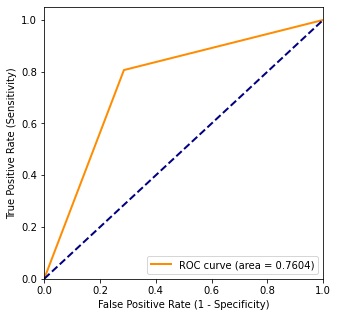

In [75]:
#Para el modelo Support Vectors Machines
classificationSummary(y_train, svm.predict(X_train))

classificationSummary(y_test1, svm.predict(X_test))

print("\nExactitud:", round(accuracy_score(y_test1, y_pred1),4))
print("Precision:", round(precision_score(y_test1, y_pred1),4))
print("Sensibilidad:", round(recall_score(y_test1, y_pred1),4))
print("F1 Score:", round(f1_score(y_test1, y_pred1),4))
print("AUC:", round(roc_auc_score(y_test1, y_pred1),4))
print("Especificidad: ", round(recall_score(y_test1, y_pred1, pos_label=0),4))
print("ROC: ", roc_auc1)

plt.figure(figsize=[5, 5])
#line width
lw = 2
#agrega ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc1)
#agrega el random guess
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

#### Algoritmo Regresion Logistica

In [76]:

X = proyecto_undersampled.drop(columns=['Stroke'])
y = proyecto_undersampled['Stroke']

X_train, X_test, y_train, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a logistic regression
# penalty= penalty for coefficient values ("l1", "l2", "none")
logit_reg = LogisticRegression(penalty="l2", solver='saga')
logit_reg.fit(X_train, y_train)

y_pred2 = logit_reg.predict(X_test)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

fpr, tpr, _ = roc_curve(y_true=y_test2, y_score=y_pred2)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc2 = auc(x=fpr, y=tpr)

intercept  -0.5226180908433549
       Hypertension  Heart Disease   Married  Avg_glucose_level       Bmi  \
coeff      0.246835       0.183853 -0.078703           0.003312 -0.082693   

            Age  Gender_Male  Residence_Urban  Formerly Smoked  Never Smoked  \
coeff  0.052842     -0.12352        -0.066758         0.099589     -0.253215   

         Smokes  Never Worked  Private Work  Self-Employed Work  
coeff -0.003581     -0.169191      -0.12779           -0.062577  


C:\Users\Public\Joaquin\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Confusion Matrix (Accuracy 0.7441)

       Prediction
Actual    0    1
     0 2724 1186
     1  802 3056
Confusion Matrix (Accuracy 0.7343)

       Prediction
Actual   0   1
     0 651 294
     1 222 775

Exactitud: 0.7343
Precision: 0.725
Sensibilidad: 0.7773
F1 Score: 0.7502
AUC: 0.7331
Especificidad:  0.6889
ROC:  0.7331104424384264


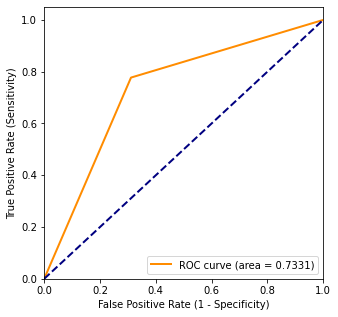

In [77]:
#Para el modelo Regresion Logistica
classificationSummary(y_train, logit_reg.predict(X_train))

classificationSummary(y_test2, logit_reg.predict(X_test))

print("\nExactitud:", round(accuracy_score(y_test2, y_pred2),4))
print("Precision:", round(precision_score(y_test2, y_pred2),4))
print("Sensibilidad:", round(recall_score(y_test2, y_pred2),4))
print("F1 Score:", round(f1_score(y_test2, y_pred2),4))
print("AUC:", round(roc_auc_score(y_test2, y_pred2),4))
print("Especificidad: ", round(recall_score(y_test2, y_pred2, pos_label=0),4))
print("ROC: ", roc_auc2)

plt.figure(figsize=[5, 5])
#line width
lw = 2
#agrega ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc2)
#agrega el random guess
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

#### 4to algoritmo: Redes Neuronales Artificiales (ANN)

In [101]:
#Se separa el dataframe en las variables predictivas y en la respuesta
X = proyecto_undersampled.drop(columns=['Stroke'])
y = proyecto_undersampled['Stroke']
#Se convierten las variables categóricas en variables numéricas utilizando la técnica de codificación one-hot encoding
X = pd.get_dummies(X)
#Se divide en set de entrenamiento y prueba
X_train, X_test, y_train, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
# Crear el modelo de redes neuronales artificiales
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred3 = model.predict(X_test)

C:\Users\Public\Joaquin\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Public\Joaquin\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Confusion Matrix (Accuracy 0.5663)

       Prediction
Actual    0    1
     0 3647  263
     1 3106  752
Confusion Matrix (Accuracy 0.5448)

       Prediction
Actual   0   1
     0 894  51
     1 833 164

Exactitud: 0.8054
Precision: 0.789
Sensibilidad: 0.8475
F1 Score: 0.8172
AUC: 0.8042
Especificidad:  0.7608
ROC:  0.804194594365106


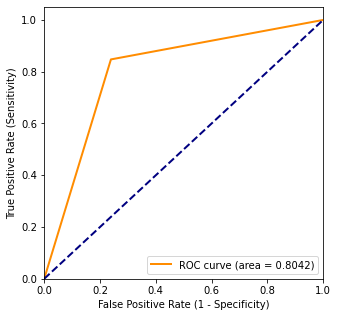

In [104]:
#Para el modelo Regresion Logistica
fpr, tpr, _ = roc_curve(y_true=y_test3, y_score=y_pred3)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc3 = auc(x=fpr, y=tpr)

classificationSummary(y_train, logit_reg.predict(X_train))

classificationSummary(y_test3, logit_reg.predict(X_test))

print("\nExactitud:", round(accuracy_score(y_test3, y_pred3),4))
print("Precision:", round(precision_score(y_test3, y_pred3),4))
print("Sensibilidad:", round(recall_score(y_test3, y_pred3),4))
print("F1 Score:", round(f1_score(y_test3, y_pred3),4))
print("AUC:", round(roc_auc_score(y_test3, y_pred3),4))
print("Especificidad: ", round(recall_score(y_test3, y_pred3, pos_label=0),4))
print("ROC: ", roc_auc3)

plt.figure(figsize=[5, 5])
#line width
lw = 2
#agrega ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc3)
#agrega el random guess
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

# 6.4 Seleccionar las variables predictivas con Random Forest

In [78]:
X = proyecto_undersampled.drop(columns=['Stroke'])
y = proyecto_undersampled['Stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
importancia = rfc.feature_importances_

In [84]:
df_predictivas = pd.DataFrame({"feature": X.columns, "importance": importancia})
df_predictivas = df_predictivas.sort_values("importance", ascending=False)

               feature  importance
5                  Age    0.392722
3    Avg_glucose_level    0.205250
4                  Bmi    0.177589
2              Married    0.035300
0         Hypertension    0.025986
6          Gender_Male    0.022777
7      Residence_Urban    0.022095
1        Heart Disease    0.020154
9         Never Smoked    0.018485
12        Private Work    0.017461
13  Self-Employed Work    0.017168
8      Formerly Smoked    0.016991
11        Never Worked    0.014243
10              Smokes    0.013781


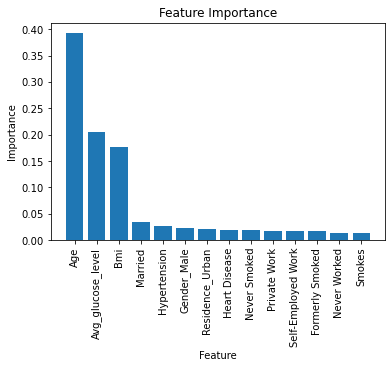

In [85]:
print(df_predictivas)
plt.bar(df_predictivas["feature"], df_predictivas["importance"])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.show()

# Referencias

La mayoria de conocimiento se obtuvo de las presentaciones vistas en clase, el resto se obtiene de lo siguiente:

​Badr, W. (2019). Having an Imbalanced Dataset? Here Is How You Can Fix It. Towards Data Science. Having an Imbalanced Dataset? Here Is How You Can Fix It. | by Will Badr | Towards Data Science

​AprendeIA. (2019). Conjunto de datos desbalanceado. AprendeIA. Conjunto de datos desbalanceado - 🤖 Aprende IA

​Gutierrez-Garcia, J. O. (2021). Datos de Entrenamiento, Validación y Prueba: ¿Cómo crearlos y qué objetivos tienen? Machine Learning. YouTube. https://www.youtube.com/watch?v=vdYzm4xC7mc

1.1. Linear Models. (s. f.). scikit-learn. https://scikit-learn.org/stable/modules/linear_model.html

6.3. Preprocessing data. (s. f.). scikit-learn. https://scikit-learn.org/stable/modules/preprocessing.html

Cho,J. Lee,K. Et.al.(2016)How much data is needed to train a medical image deep learning system, to achieve necessary high accuracy​